**Project: Digit Recognizer** 

#**Ingest & EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

drive.mount('/content/gdrive')
train=pd.read_csv('gdrive/My Drive/train05.csv')
test=pd.read_csv('gdrive/My Drive/test05.csv')
print(train.shape)
print(test.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(42000, 785)
(28000, 784)


In [ ]:
train.dropna()
print(train.shape)

(42000, 785)


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=train['label']
train.drop("label",axis=1,inplace=True)
x = train.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

In [ ]:
x_std = StandardScaler().fit_transform(x_train)

# **Model & Evaluate**

Random Forecast Classifier

In [ ]:
start=datetime.now()
rnd_clf1 = RandomForestClassifier(n_jobs=-1)
rnd_clf1.fit(x_std, y_train)
end=datetime.now()
print(end-start)

0:00:18.335325


PCA Implementation with 95% of the Variability

(33600, 315)


<BarContainer object of 315 artists>

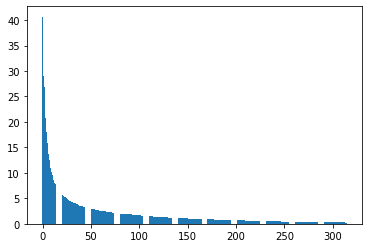

In [ ]:
pca = PCA(n_components=0.95)
x_pca1 = pca.fit_transform(x_std)
print(x_pca1.shape)
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)

PCA Implementation with 70 Components

(33600, 70)


0.6379577369294912

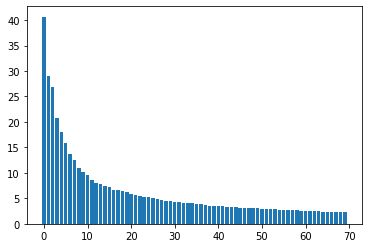

In [ ]:
pca = PCA(n_components=70)
x_pca2 = pca.fit_transform(x_std)
print(x_pca2.shape)
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
sum(pca.explained_variance_ratio_)

Randome Forecast Classifier on PCA Data (95% variability)

In [ ]:
start=datetime.now()
rnd_clf2 = RandomForestClassifier(n_jobs=-1)
rnd_clf2.fit(x_pca1, y_train)
end=datetime.now()
print(end-start)

0:01:00.019902


KMeans Clustering and Evaluation

In [ ]:
kmeans=KMeans(n_clusters=10, random_state=3)
y_pred1=kmeans.fit_predict(x_pca1)

In [ ]:
adjusted_rand_score(y_train, y_pred1)

0.3195013005279515

In [ ]:
kmeans=KMeans(n_clusters=10, random_state=3)
y_pred2=kmeans.fit_predict(x_pca2)
adjusted_rand_score(y_train, y_pred2)

0.3196336506310146

In [ ]:
kmeans=KMeans(n_clusters=10, random_state=3)
y_pred3=kmeans.fit_predict(x_train)
adjusted_rand_score(y_train, y_pred3)

0.3642233563412306

# **Conclusion**

It seems like it takes longer to run the Random Forest Classifier after the PCA process, with 18 seconds before and 60 seconds after. The Random Forecast algorithm is iterating over possible splits that optimize the criterion. However, by reducing the number of features, it might be more difficult to find the splits (by having less good splits to find). It ends up making the algorithm requiresmore iterations to find a good split.

KMeans has been used to find the 10 clusters for 10 digits. Using the Adjusted Rand Index from range 0 to 1, we can evaluate the performances. Of course, we can see that KMenas works best before the PCA process but with a longer running time. However, Adjusted Rand Indexs are very close after the two PCA process, with 0.3195013005279515 for 95% of variability, and 0.31532544858459766 for 63.8% of the variability. 